## Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [93]:
# Ignore all warnings
warnings.filterwarnings('ignore')

## Reading and Exploring the Air Quality Dataset

In [94]:
df = pd.read_csv('Energy_consumption_dataset.csv')

#### Analyzing the Dataset 
 - Size, data types, null value rate, statistical information for each column

In [95]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


# Key Features:

1. Temporal Features
Month (1-12): Captures seasonal variations in energy consumption
Hour (0-23): Tracks daily consumption patterns and peak usage times

2. Environmental Parameters
Temperature (20-30°C range): Critical factor affecting HVAC energy usage
Humidity (30-60% range): Impacts cooling load and occupant comfort

3. Building Characteristics
SquareFootage (1000-2000 sq ft): Building size directly correlates with energy needs
Occupancy (0-9 scale): Human presence affects energy consumption patterns

4. Energy Metrics
RenewableEnergy (0-30 range): Contribution from renewable sources
EnergyConsumption (53-99 range): Total energy consumed, likely in kWh

In [97]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [98]:
df.shape

(5000, 12)

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


In [100]:
df.isnull().sum().sum()

0

In [101]:
df.duplicated().sum()

0

## Now we will start our Data Exploration using Visulization EDA 

## Exploratory Data Analysis

In [103]:
monthly_average_consumption = df.groupby('Month')['EnergyConsumption'].mean()

In [104]:
monthly_average_consumption = monthly_average_consumption.reset_index()

## Bivariate Analysis

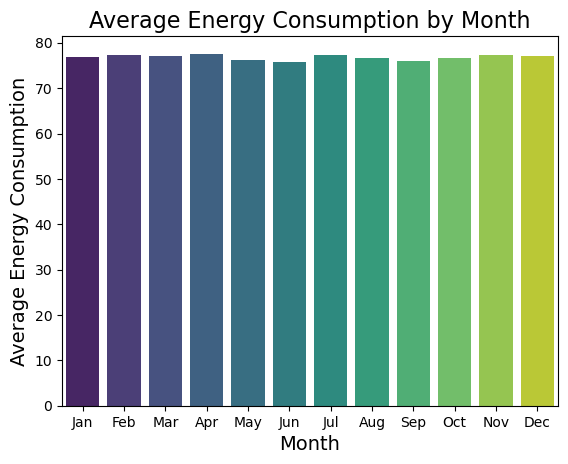

In [105]:
sns.barplot(x='Month', y= 'EnergyConsumption', data=monthly_average_consumption, palette='viridis')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

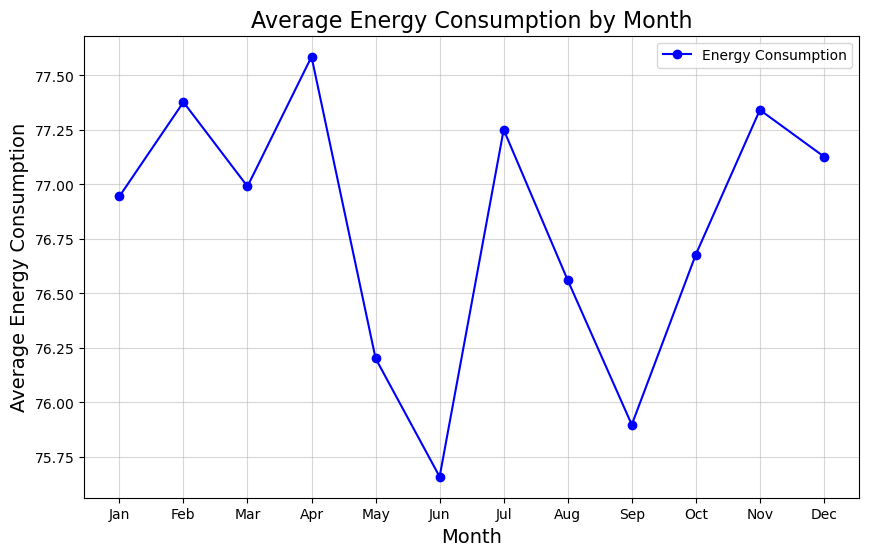

In [106]:
monthly_avg_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_consumption['Month'],
         monthly_avg_consumption['EnergyConsumption'],
         marker='o', color='b', label='Energy Consumption')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

The Average Energy Consumption values remain relatively stable throughout the year, ranging from 75 to 79 across the months. This suggests that energy consumption does not significantly vary based on the month alone.

As a result, creating dummy variables for the "Month" column might not contribute much predictive value to the model. Instead, we could consider the following approaches:

    Drop the "Month" column entirely to simplify the model.
    Introduce a new "Season" column to capture potential seasonal patterns by grouping months with similar characteristics. This approach preserves insights into how energy consumption might vary by season without adding unnecessary complexity.

In [107]:
def get_season(month):
    if month in [3, 4, 5]:  # Summer: Mar, Apr, May
        return 'Summer'
    elif month in [6, 7, 8]:  # Monsoon: Jun, Jul, Aug
        return 'Monsoon'
    elif month in [9, 10, 11]:  # Autumn: Sep, Oct, Nov
        return 'Autumn'
    else:  # Winter: Dec, Jan, Feb
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)
df = df.drop('Month', axis=1)
columns = ['Season'] + [col for col in df.columns if col != 'Season']
df = df[columns]

In [108]:
df.Season.value_counts()

Season
Winter     1400
Summer     1200
Monsoon    1200
Autumn     1200
Name: count, dtype: int64

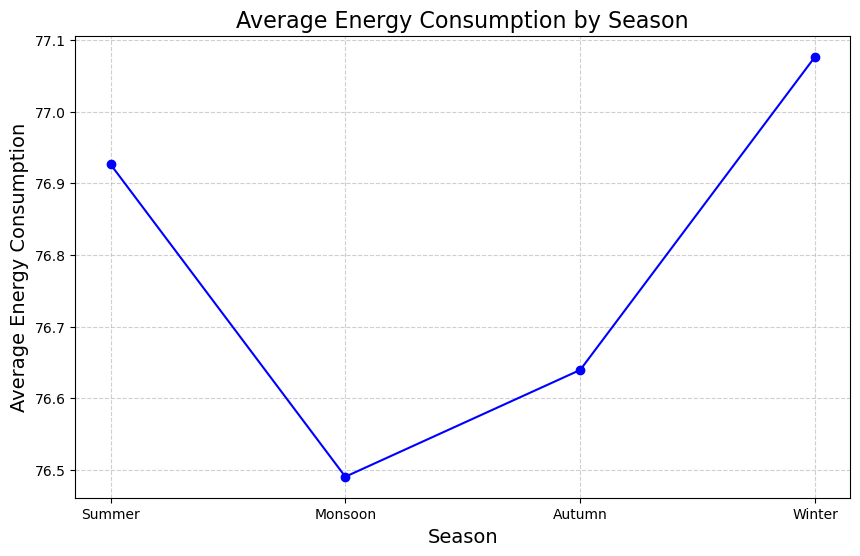

In [109]:
season_avg_consumption = df.groupby('Season')['EnergyConsumption'].mean().reset_index()

# Define the order of seasons
season_order = ['Summer', 'Monsoon', 'Autumn', 'Winter']
season_avg_consumption['Season'] = pd.Categorical(season_avg_consumption['Season'], categories=season_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(season_avg_consumption['Season'], season_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

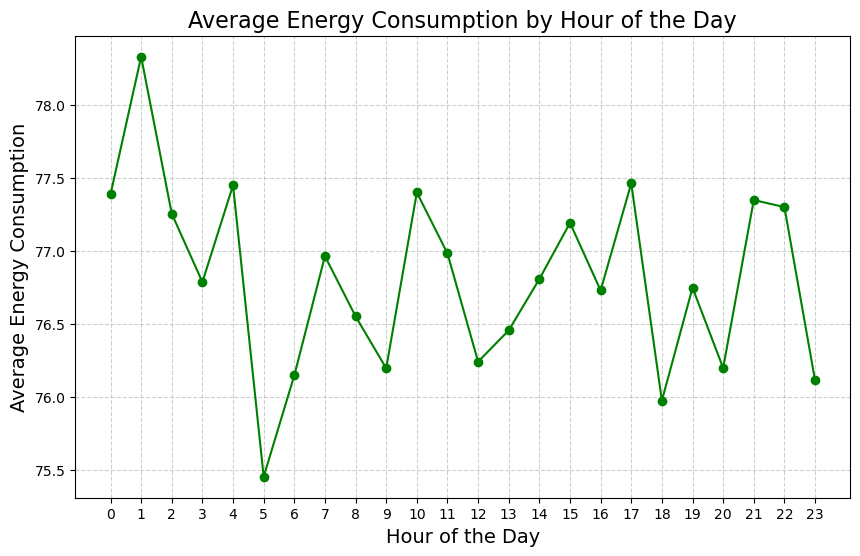

In [110]:
hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='g')
plt.title('Average Energy Consumption by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Hour range from 0 to 23
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

Although there are some variations in Energy Consumption throughout the day, the values remain within a narrow range of 75 to 79. This indicates that energy consumption does not significantly differ by individual hour.  

Creating dummy variables for all 24 hours (0 to 23) would substantially increase the dimensionality of the dataset, complicating the model and potentially leading to issues like overfitting.  

To simplify the model while still capturing time-of-day effects, we can group the hours into broader time periods with similar energy consumption patterns:  

- **Morning**: 6 AM to 12 PM  
- **Afternoon**: 12 PM to 6 PM  
- **Evening**: 6 PM to 9 PM  
- **Night**: 9 PM to 6 AM  

This approach reduces the number of features, lowers the model’s complexity, and retains valuable insights into how energy consumption varies across different parts of the day.

In [111]:
def get_time_of_day(hour):
    if 4 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
df = df.drop('Hour', axis=1)
columns = ['Season', 'TimeOfDay'] + [col for col in df.columns if col not in ['Season', 'TimeOfDay']]
df = df[columns]

In [112]:
df.head()

,Season,TimeOfDay,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


<Axes: ylabel='count'>

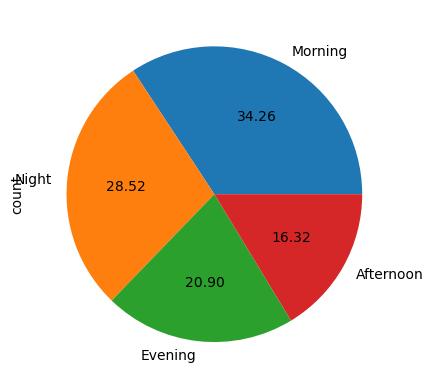

In [113]:
df.TimeOfDay.value_counts().plot(kind='pie', autopct='%.2f')

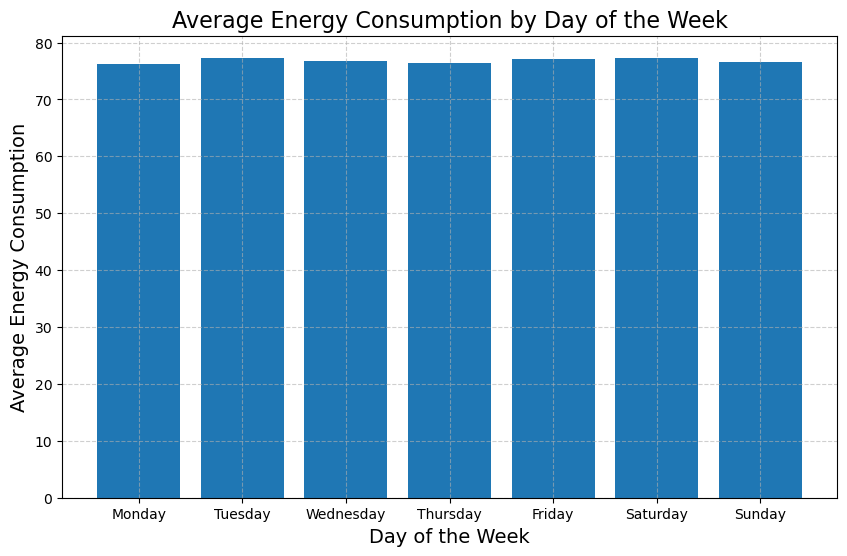

In [114]:
dayofweek_avg_consumption = df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

# Sort the days of the week to ensure correct order
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg_consumption['DayOfWeek'] = pd.Categorical(dayofweek_avg_consumption['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_avg_consumption = dayofweek_avg_consumption.sort_values('DayOfWeek')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(dayofweek_avg_consumption['DayOfWeek'], dayofweek_avg_consumption['EnergyConsumption'])
plt.title('Average Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()



In [115]:
df.drop('DayOfWeek', axis=1, inplace=True)

In [116]:
categorical_features = ['Season', 'TimeOfDay', 'Holiday', 'HVACUsage', 'LightingUsage']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Season_Monsoon,Season_Summer,Season_Winter,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,False,True,False,False,True,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,False,True,False,False,True,False,True,True
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,False,True,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,False,True,False,False,True,False,False,True
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,False,True,False,True,False,False,True,False


In [117]:
X = df.drop(columns=['EnergyConsumption'])

y = df['EnergyConsumption']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [119]:
X_train.shape

(4000, 14)

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [121]:
X_train_scaled

array([[0.38356624, 0.16583629, 0.78710351, ..., 1.        , 0.        ,
        1.        ],
       [0.03026714, 0.67376719, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.05697615, 0.34603388, 0.39311902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.87394221, 0.35380599, 0.58082363, ..., 0.        , 1.        ,
        1.        ],
       [0.60222829, 1.        , 0.88663545, ..., 1.        , 1.        ,
        1.        ],
       [0.31837734, 0.96334379, 0.8799872 , ..., 0.        , 1.        ,
        0.        ]])

## Importing Keras Library

In [122]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [123]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 14))
model.add(Dropout(0.01))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [124]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=Huber(),
              metrics=['mae'])

In [125]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
history = model.fit(X_train_scaled, y_train,
                    validation_data= (X_test_scaled, y_test),
                    epochs = 30,
                    batch_size=32,
                    verbose=1)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74.5972 - mae: 75.0972 - val_loss: 65.5871 - val_mae: 66.0871
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.9085 - mae: 59.4085 - val_loss: 27.4184 - val_mae: 27.9184
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5195 - mae: 18.0136 - val_loss: 10.2946 - val_mae: 10.7840
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5834 - mae: 11.0757 - val_loss: 9.5446 - val_mae: 10.0352
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2825 - mae: 9.7706 - val_loss: 8.9697 - val_mae: 9.4582
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9558 - mae: 9.4429 - val_loss: 8.5323 - val_mae: 9.0181
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7809 - mae: 9.2705 - val_loss: 8.1730 - val_mae: 8.6597
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3744 - mae: 8.8615 - val_loss: 7.8434 - val_mae: 8.3251
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0

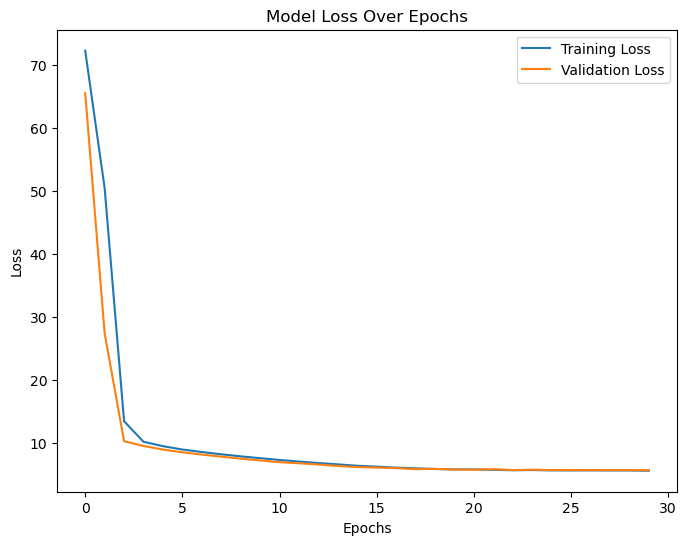

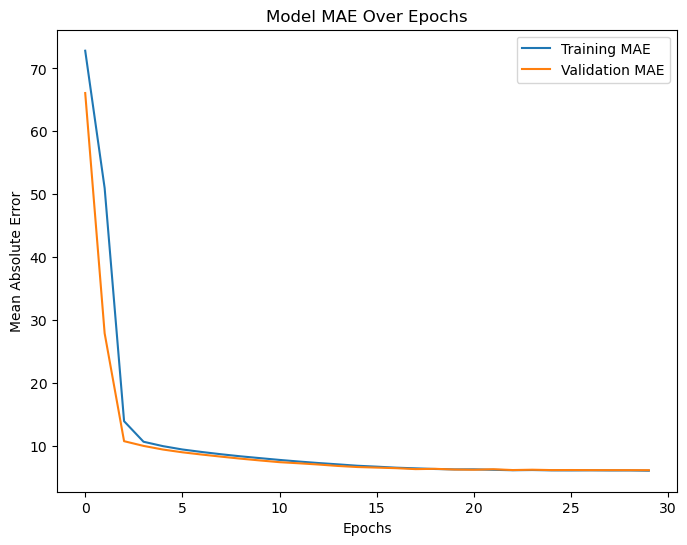

In [127]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Evaluate the model

In [128]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8910 - mae: 6.3782 
Test Loss: 5.695022106170654
Test MAE: 6.1784138679504395


## Plot Performance

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


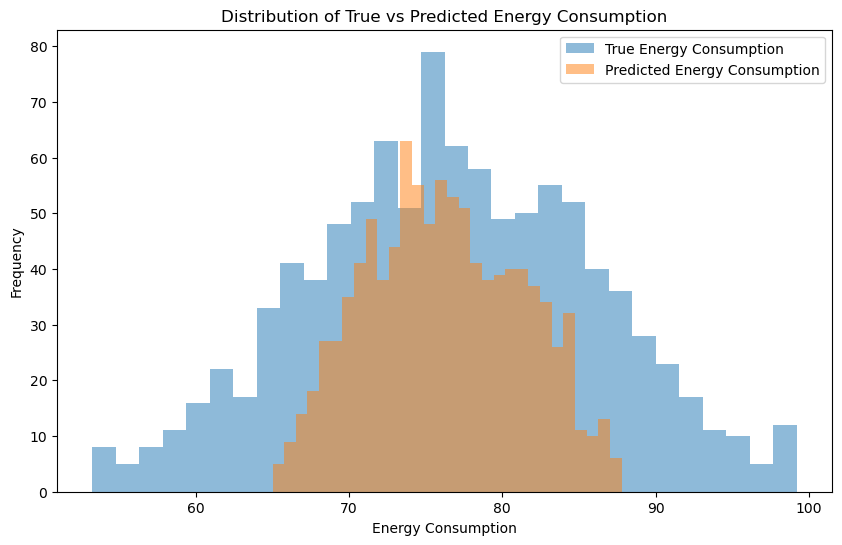

In [129]:
y_pred = model.predict(X_test_scaled)

# Plot histograms of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='True Energy Consumption')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of True vs Predicted Energy Consumption')
plt.legend(loc='upper right')
plt.show()

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')

Mean Absolute Error (MAE): 6.17841379823698
Mean Squared Error (MSE): 60.39741622144442
Root Mean Squared Error (RMSE): 7.771577460300092
R² Score: 0.304511384433213
Explained Variance Score: 0.3068582954096334


In [131]:
model.save('model.keras')